In [48]:
# General Libraries
import os
import math
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Google Colab
from google.colab import drive
import gdown
import joblib

# Scikit-learn (Data Processing & ML)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error

# TensorFlow & Keras (Deep Learning)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.models import load_model
import gc
import tensorflow.keras.backend as K

In [49]:
# Define File IDs from Google Drive
CSV_FILE_ID = "1--7jIKTCbZYbcqBhf4WWNk9XYGiskMUy"
JSON_FILE_ID = "1-Coff2iGNVDvnZAN-ku1-cOfbpqymdfM"
PICKLE_FILE_ID = "1-1Sjs3OKqw75dbJ9yi59Oa3gGArt8P_u"

# Define Local Save Paths
CSV_PATH = "/content/processed_data.csv"
JSON_PATH = "/content/processed_data.json"
PICKLE_PATH = "/content/processed_data.pkl"

# Function to download files
def download_file(file_id, output_path):
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, output_path, quiet=False)

# Download Each File
download_file(CSV_FILE_ID, CSV_PATH)
download_file(JSON_FILE_ID, JSON_PATH)
download_file(PICKLE_FILE_ID, PICKLE_PATH)

print(" All files downloaded successfully!")

# Load the dataset from CSV
merged_df = pd.read_csv(CSV_PATH)

# Display first few rows to confirm
print("🔍 Sample Data:")
display(merged_df.head())

# Try loading Pickle (Fastest format)
try:
    print("Downloading Pickle dataset...")
    gdown.download(f"https://drive.google.com/uc?id={PICKLE_FILE_ID}", PICKLE_PATH, quiet=False)
    merged_df = pd.read_pickle(PICKLE_PATH)
    print("Loaded dataset from Pickle!")
except Exception as e:
    print("ok Pickle file not found, trying CSV...", e)

    # Fallback to CSV (If Pickle fails)
    try:
        print("Downloading CSV dataset...")
        gdown.download(f"https://drive.google.com/uc?id={CSV_FILE_ID}", CSV_PATH, quiet=False)
        merged_df = pd.read_csv(CSV_PATH)
        print("Loaded dataset from CSV!")
    except Exception as e:
        print("ERROR: Unable to load dataset!", e)
        exit()

# Load real-time JSON data (if available)
try:
    print("Downloading JSON dataset...")
    gdown.download(f"https://drive.google.com/uc?id={JSON_FILE_ID}", JSON_PATH, quiet=False)
    with open(JSON_PATH, "r") as json_file:
        json_data = json.load(json_file)
    print("Loaded JSON data for app integration!")
except Exception as e:
    print("⚠ JSON file not found, skipping real-time data.", e)

Downloading...
From (original): https://drive.google.com/uc?id=1--7jIKTCbZYbcqBhf4WWNk9XYGiskMUy
From (redirected): https://drive.google.com/uc?id=1--7jIKTCbZYbcqBhf4WWNk9XYGiskMUy&confirm=t&uuid=31c2416b-853c-45bc-aecc-c6fd620ce581
To: /content/processed_data.csv
100%|██████████| 203M/203M [00:01<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-Coff2iGNVDvnZAN-ku1-cOfbpqymdfM
To: /content/processed_data.json
100%|██████████| 24.0/24.0 [00:00<00:00, 56.1kB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1Sjs3OKqw75dbJ9yi59Oa3gGArt8P_u
To: /content/processed_data.pkl
100%|██████████| 86.8M/86.8M [00:00<00:00, 194MB/s]


 All files downloaded successfully!
🔍 Sample Data:


,date,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,...,aru_001_cws_temp,rtu_001_sa_temp,rtu_002_sa_temp,rtu_003_sa_temp,rtu_004_sa_temp,aru_001_power_mbtuph,total_hvac,total_lighting,total_mels,hour
0,2020-01-01 00:00:00,0.045933,0.000000,0.503252,0.489130,0.604774,0.554712,0.857143,0.074557,0.423518,...,0.557672,0.681570,0.685223,0.748628,0.785548,0.02026,0.684199,0.013905,0.499896,0
1,2020-01-01 00:05:00,0.046415,0.432004,0.519356,0.491870,0.628968,0.554712,0.858286,0.075026,0.423518,...,0.557672,0.711014,0.682186,0.754116,0.789044,0.02026,0.576201,0.013517,0.392597,0
2,2020-01-01 00:10:00,0.046897,0.864009,0.535460,0.494609,0.653161,0.554712,0.859429,0.075496,0.423518,...,0.557672,0.704471,0.695344,0.750823,0.787879,0.02026,0.468203,0.013130,0.285298,0
3,2020-01-01 00:15:00,0.046897,0.863782,0.538712,0.489174,0.624968,0.554712,0.859429,0.075026,0.419827,...,0.557672,0.688113,0.691296,0.747530,0.784382,0.02026,0.360205,0.012743,0.177999,0
4,2020-01-01 00:20:00,0.046897,0.863555,0.541963,0.483739,0.596774,0.554712,0.859429,0.074557,0.416137,...,0.557672,0.690294,0.679150,0.746432,0.785548,0.02026,0.363409,0.013130,0.203477,0


Downloading...
From: https://drive.google.com/uc?id=1-1Sjs3OKqw75dbJ9yi59Oa3gGArt8P_u
To: /content/processed_data.pkl
100%|██████████| 86.8M/86.8M [00:00<00:00, 160MB/s]


Loaded dataset from Pickle!


Downloading...
From: https://drive.google.com/uc?id=1-Coff2iGNVDvnZAN-ku1-cOfbpqymdfM
To: /content/processed_data.json
100%|██████████| 24.0/24.0 [00:00<00:00, 60.0kB/s]

⚠ JSON file not found, skipping real-time data. name 'json' is not defined


In [50]:
# Prepare data split for TPU training (Temperature Forecasting)

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # detect TPU
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("All TPU devices: ", tf.config.list_logical_devices('TPU'))
except ValueError:
    # Fallback to CPU or GPU if TPU not found
    strategy = tf.distribute.get_strategy()

# Define time steps for LSTM
time_steps = 8

with strategy.scope():
    model = Sequential([
        LSTM(32, activation="relu", return_sequences=True, input_shape=(time_steps, 1)),
        LSTM(16, activation="relu"),
        Dense(1)  # Predict a single temperature value
    ])
    model.compile(optimizer="adam", loss="mae")

# Load and Preprocess Data
merged_df["date"] = pd.to_datetime(merged_df["date"])

# Select First 3 Months Before COVID
df_3m = merged_df[(merged_df["date"] >= "2020-01-01") & (merged_df["date"] < "2020-04-01")].copy()

# Feature Engineering
df_3m["hour"] = df_3m["date"].dt.hour  # Hour of the day
df_3m["day_of_week"] = df_3m["date"].dt.dayofweek  # Monday=0, Sunday=6

# Convert Data to Numpy Arrays for Training
temperature_column = ["zone_016_temp"]  # Change this to forecast different zones

data = df_3m[temperature_column].values

X = np.array([data[i:i+time_steps] for i in range(0, len(data) - time_steps)])
y = np.array([data[i+time_steps] for i in range(0, len(data) - time_steps)])

print(f"Optimized Training Data Shape: X={X.shape}, y={y.shape}")

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Data to Efficient TensorFlow Dataset
BATCH_SIZE = 32  # TPU prefers large batches
BUFFER_SIZE = 10000

def prepare_tpu_dataset(X, y, batch_size=32, buffer_size=10000):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_data = prepare_tpu_dataset(X_train, y_train)
test_data = prepare_tpu_dataset(X_test, y_test)

Optimized Training Data Shape: X=(27654, 8, 1), y=(27654, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
# Train model for predicting hourly energy usage using a TPU
model.fit(train_data, epochs=5, validation_data=test_data, verbose=1)

# Save model
model.save("hourly_teperature_prediction.keras")  # or .pb, or a folder with tf.saved_model

# Save to drive for reuse
drive.mount('/content/drive')

MODEL_PATH = "/content/drive/MyDrive/connect_models/"

# Ensure the directory exists
os.makedirs(MODEL_PATH, exist_ok=True)

# Save the trained model
model.save(f"{MODEL_PATH}hourly_temperature_prediction.keras")

print(f"Model saved to {MODEL_PATH}hourly_energy_prediction.keras")

print("Model Trained and saved!")

Epoch 1/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.1405 - val_loss: 0.0126
Epoch 2/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0103 - val_loss: 0.0089
Epoch 3/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0090 - val_loss: 0.0081
Epoch 4/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 5/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0081 - val_loss: 0.0072
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to /content/drive/MyDrive/connect_models/hourly_energy_prediction.keras
Model Trained and saved!


(5531, 1) (5531, 1)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model not found in /content/hourly_temperature_prediction.keras, loading from Google Drive...
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Model Evaluated!
Normalized MAE - Temp Zone 016: 0.01
Unnormalized MAE - Temp Zone 016: 0.13°C


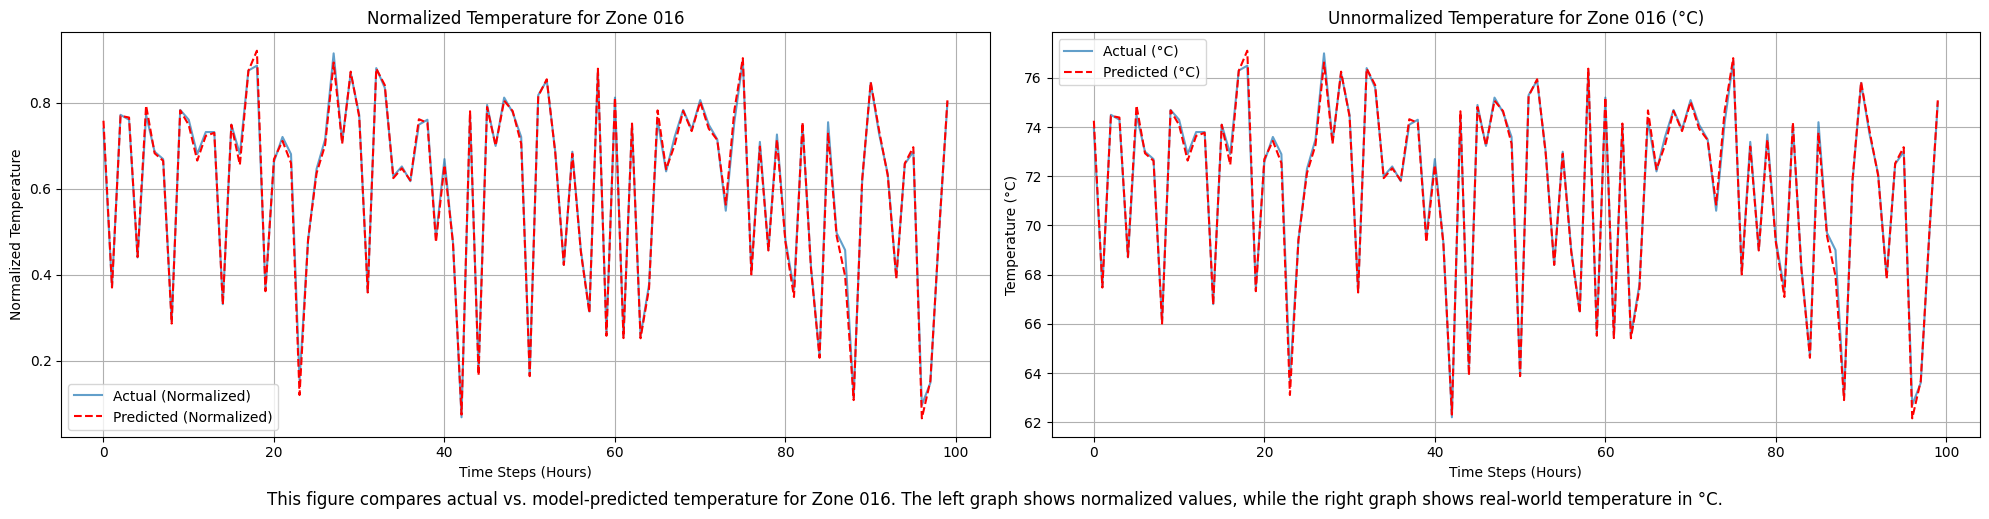

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

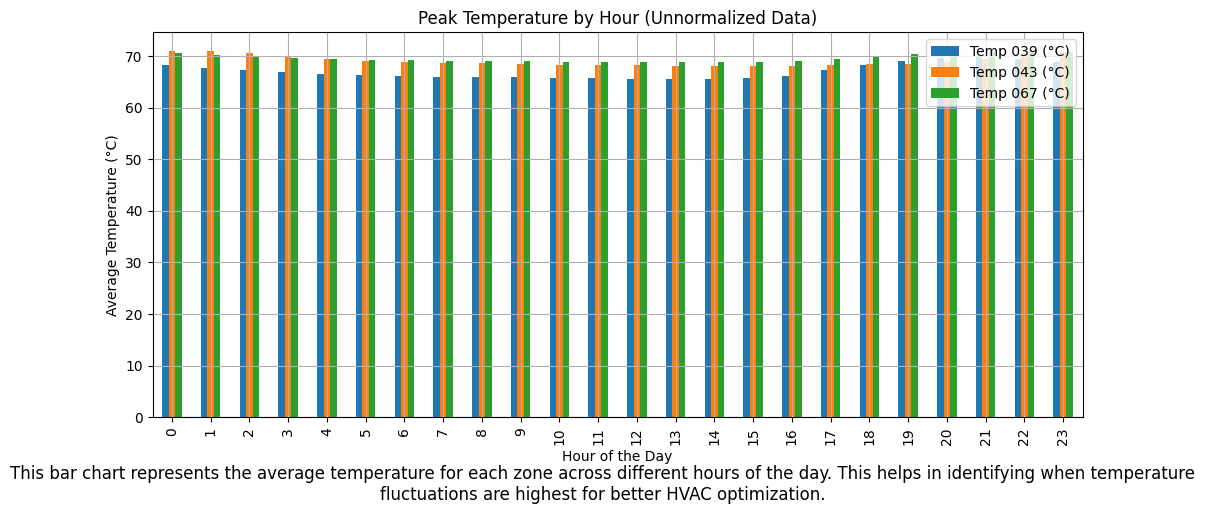

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


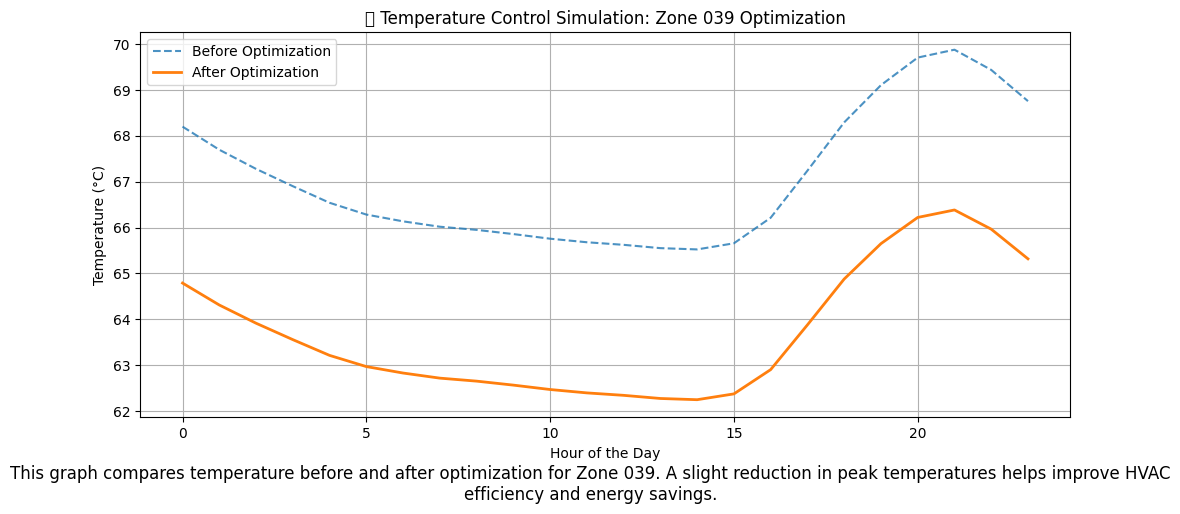

In [52]:

print(y_test.shape, y_pred.shape)
# Train & Evaluate the model
# Define paths
SCALAR_PATH = "/content/drive/MyDrive/scalars/"
LOCAL_MODEL_PATH = "/content/hourly_temperature_prediction.keras"
DRIVE_MODEL_PATH = "/content/drive/MyDrive/connect_models/hourly_temperature_prediction.keras"

# Mount Google Drive
drive.mount('/content/drive')

# Check if the model exists locally first, else load from Google Drive
if os.path.exists(LOCAL_MODEL_PATH):
    print(f"Loading model from {LOCAL_MODEL_PATH}")
    model = load_model(LOCAL_MODEL_PATH)
else:
    print(f"Model not found in {LOCAL_MODEL_PATH}, loading from Google Drive...")
    model = load_model(DRIVE_MODEL_PATH)

# Load scalers
scaler_features = joblib.load(f"{SCALAR_PATH}scaler_features.pkl")  # Feature scaler
scaler_temp = joblib.load(f"{SCALAR_PATH}scaler_temp.pkl")  # Temperature scaler

# Load Model & Predict
y_pred = model.predict(X_test, batch_size=32)

# Inverse Transform to Get Unnormalized Temperature Values (Real °C)
y_test_original = scaler_temp.inverse_transform(y_test)
y_pred_original = scaler_temp.inverse_transform(y_pred)

# Calculate MAE for Normalized and Unnormalized Data
mae_temp_016_norm = mean_absolute_error(y_test, y_pred)

mae_temp_016 = mean_absolute_error(y_test_original, y_pred_original)

# Print MAE Results
print("Model Evaluated!")
print(f"Normalized MAE - Temp Zone 016: {mae_temp_016_norm:.2f}")
print(f"Unnormalized MAE - Temp Zone 016: {mae_temp_016:.2f}°C")

# Function to plot normalized and unnormalized temperature predictions
def plot_temperature_usage_separate(y_test_norm, y_pred_norm, y_test_c, y_pred_c, zone):
    """
    Plots two separate graphs:
    - One for normalized data
    - One for unnormalized temperature data (°C)
    """
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    # Normalized Plot
    axes[0].plot(y_test_norm[:100], label="Actual (Normalized)", alpha=0.7)
    axes[0].plot(y_pred_norm[:100], label="Predicted (Normalized)", linestyle="dashed", color="red")
    axes[0].set_title(f"Normalized Temperature for Zone {zone}")
    axes[0].set_xlabel("Time Steps (Hours)")
    axes[0].set_ylabel("Normalized Temperature")
    axes[0].legend()
    axes[0].grid(True)

    # Unnormalized Plot (Real Temperature in °C)
    axes[1].plot(y_test_c[:100], label="Actual (°C)", linestyle="solid", alpha=0.7)
    axes[1].plot(y_pred_c[:100], label="Predicted (°C)", linestyle="dashed", color="red")
    axes[1].set_title(f"Unnormalized Temperature for Zone {zone} (°C)")
    axes[1].set_xlabel("Time Steps (Hours)")
    axes[1].set_ylabel("Temperature (°C)")
    axes[1].legend()
    axes[1].grid(True)

    plt.figtext(0.5, -0.02, f"This figure compares actual vs. model-predicted temperature for Zone {zone}. "
                            f"The left graph shows normalized values, while the right graph shows real-world temperature in °C.",
                wrap=True, horizontalalignment='center', fontsize=12)

    plt.tight_layout()
    plt.show()

# Plot Normalized & Unnormalized Data Separately
plot_temperature_usage_separate(y_test[:, 0], y_pred[:, 0], y_test_original[:, 0], y_pred_original[:, 0], "016")

# Compute Absolute Errors on Unnormalized Data
error_temp_016 = np.abs(y_test_original[:100, 0] - y_pred_original[:100, 0])


# Temp Zone 016
ax.plot(error_temp_016, label="Absolute Error (Temp 016)", alpha=0.8, marker="o", color="red")
ax.set_title("Temperature Zone 016 Absolute Error")
ax.set_ylabel("Error (°C)")
ax.set_xlabel("Time Steps (Hours)")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.figtext(0.5, -0.05, "This graph illustrates the absolute prediction error for temperature forecasting in Zone 016. "
                        "Higher error values indicate larger discrepancies between actual and predicted temperatures.",
            wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

plt.tight_layout()
plt.figtext(0.5, -0.05, "These graphs illustrate the absolute prediction error for temperature forecasting across different zones. "
                        "Higher error values indicate larger discrepancies between actual and predicted values.",
            wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

# Peak Temperature Usage by Hour (Unnormalized)
hourly_avg = merged_df.groupby("hour")[["zone_039_temp", "zone_043_temp", "zone_067_temp"]].mean()
hourly_avg_c = scaler_temp.inverse_transform(hourly_avg)

hourly_avg_df = pd.DataFrame(hourly_avg_c, columns=["Temp 039 (°C)", "Temp 043 (°C)", "Temp 067 (°C)"], index=range(24))

plt.figure(figsize=(12, 5))
hourly_avg_df.plot(kind="bar", figsize=(12, 5))
plt.title("Peak Temperature by Hour (Unnormalized Data)")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.grid(True)

plt.figtext(0.5, -0.05, "This bar chart represents the average temperature for each zone across different hours of the day. "
                        "This helps in identifying when temperature fluctuations are highest for better HVAC optimization.",
            wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

# Simulated Temperature Optimization: Reduce Peak by 5%
optimized_temp = hourly_avg_df * 0.95  # Assume 5% improvement in temperature control

plt.figure(figsize=(12, 5))
plt.plot(hourly_avg_df["Temp 039 (°C)"], label="Before Optimization", linestyle="dashed", alpha=0.8)
plt.plot(optimized_temp["Temp 039 (°C)"], label="After Optimization", linewidth=2)
plt.title("🏢 Temperature Control Simulation: Zone 039 Optimization")
plt.xlabel("Hour of the Day")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)

plt.figtext(0.5, -0.05, "This graph compares temperature before and after optimization for Zone 039. "
                        "A slight reduction in peak temperatures helps improve HVAC efficiency and energy savings.",
            wrap=True, horizontalalignment='center', fontsize=12)

plt.show()